X_train shape: (16, 128, 128, 3)
16 train samples
4 test samples
Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6904 - accuracy: 0.5625
Epoch 2/20
1/1 [==============================] - 0s 208ms/step - loss: 0.6811 - accuracy: 0.5625
Epoch 3/20
1/1 [==============================] - 0s 205ms/step - loss: 0.6727 - accuracy: 0.6875
Epoch 4/20
1/1 [==============================] - 0s 216ms/step - loss: 0.6573 - accuracy: 0.6875
Epoch 5/20
1/1 [==============================] - 0s 230ms/step - loss: 0.6413 - accuracy: 0.6250
Epoch 6/20
1/1 [==============================] - 0s 201ms/step - loss: 0.6198 - accuracy: 0.6875
Epoch 7/20
1/1 [==============================] - 0s 195ms/step - loss: 0.6073 - accuracy: 0.6875
Epoch 8/20
1/1 [==============================] - 0s 203ms/step - loss: 0.5821 - accuracy: 0.6875
Epoch 9/20
1/1 [==============================] - 0s 225ms/step - loss: 0.5606 - accuracy: 0.6875
Epoch 10/20
1/1 [==============================] - 0s 19

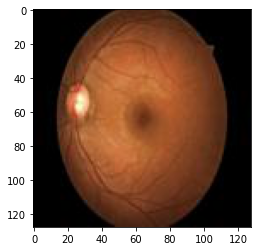

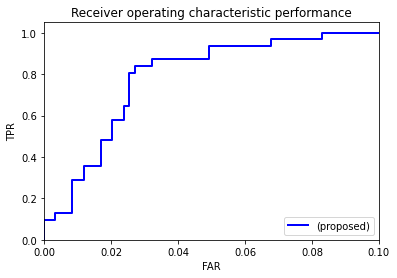

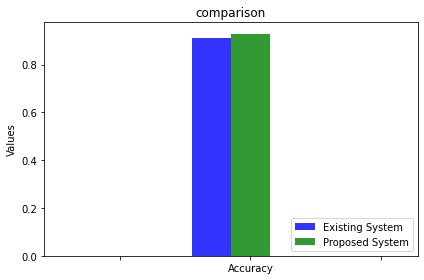

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

img_rows, img_cols = 128, 128
img_channels = 1


path1='/home/pendlimarri/eyes'
path2='/home/pendlimarri/eyes resized'


img_rows=128
img_cols=128
listing = os.listdir(path1)
num_samples = size(listing)

for file in listing:
    im= Image.open(path1 + '/' + file)
    img=im.resize((img_rows,img_cols))
    gray=img
    gray.save(path2+'/'+file, "JPEG")

imlist= os.listdir(path2)

im1=array(Image.open('/home/pendlimarri/eyes resized' + '/'+ imlist[0]))
m,n=im1.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open('/home/pendlimarri/eyes resized' + '/' + im2)).flatten() for im2 in imlist],'f')
label=np.ones((num_samples,),dtype = int)

label = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]
img=immatrix[8].reshape(img_rows,img_cols,3)
plt.imshow(uint8(img))

batch_size = 32
nb_classes = 2
nb_epoch = 5

nb_filters = 32
nb_pool=2
nb_conv=3

(X, y)=(train_data[0],train_data[1])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=4)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

k = np_utils.to_categorical(y_train, nb_classes)
kt = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(64, (3,3), activation='relu', input_shape=(128,128,3), data_format='channels_last',padding='same'))
convout1 = Activation('relu')
model.add(convout1)

model.add(Convolution2D(64, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))



model.add(Convolution2D(128,nb_conv,nb_conv))
convout3 = Activation('relu')
model.add(convout3)


model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs=20;
hist = model.fit(np.array(X_train), np.array(k), batch_size=batch_size, epochs=epochs, shuffle=True)


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

iris = datasets.load_iris()
X=iris.data
y=iris.target

y=label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X=np.c_[X, random_state.randn(n_samples, 100 * n_features)]

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=.6,random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel = 'linear', probability=True,random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


fpr = dict()
tpr = dict()
roc_auc= dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro']= auc(fpr['micro'], tpr['micro'])



plt.figure(2)
lw=2
plt.plot(fpr[2]/10, tpr[2], color='blue',lw=lw, label = '(proposed)')

plt.xlim([0.0, 0.1])
plt.ylim([0.0, 1.05])
plt.xlabel('FAR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic performance')
plt.legend(loc = 'lower right')
plt.show()



n_groups = 3
means_frank = (0,0.91,0)
means_guido = (0,0.93,0)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width, alpha=opacity,
                color = 'b',label = 'Existing System')

rects2 = plt.bar(index + bar_width, means_guido, bar_width, alpha = opacity, 
                color = 'g',label = 'Proposed System')

plt.xlabel('')
plt.ylabel('Values')
plt.title('comparison')
plt.xticks(index + bar_width, ('', 'Accuracy', ''))
plt.legend(loc = 'lower right')


plt.tight_layout()
plt.show()

